<a href="https://colab.research.google.com/github/alirezash97/Machine-Learning-Course/blob/main/Final_Project/Annotations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !wget 'https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/23870/1781260/compressed/train.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1614769186&Signature=TF3GWgyuUO6snBbvcYB8XQ%2F%2BdYpUNK%2BMTaeocRh2NID2323n%2FgO21bm5QtFz5Mux6JpY1d2fJn3oq%2By1tOfqIUCSDO0bzET4S5HFHYMtO4XIC%2Fo%2FnRylWMK3eXE3Ev4s4a%2Bk2%2FnXHfJG5wfTfW8UZ6ScIEDyDjtCj6VyvquLTrxK19tT4woHbNpIMxqVTPP%2FMx6OIhMqV5GaaXmpdLcDY4LtjqrEogj6QtquiWeXrNUnVDfTyxSlpoj%2BVsGwlwofIuxUsGG9iqhSSTo%2F9l%2FeFCtLlTI%2FOVUm3WSyu%2BFViSFhZ8ZOoUV8yUGm0qsGFbF5FMcpVeI4dT8rdp93s6Ezog%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.zip'



# !wget 'https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/23870/1781260/compressed/train_annotations.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1614769218&Signature=jtUg9fJpXJgw4v%2Bt7Q5Mng8M%2FhiW3m4BZL9%2BDYASeFl3CgxqY7COpfLKYTSLNRmKy1DRGhpWCC9v0jWNbyYQvf51CulG9MSGAuE4Irs%2BSx60%2FCpXn6CbY2qu%2BF3HJPqGMsHn90VddyIfP%2B7mS2uhDZM4zRlOIJK5B4ZGb3841lgoopJS3D0DFBpdF1TGKolSXPyxU3lBQbKk5QfUgeuYITvIguQcHbRONzJdiA1DYh%2FrBMwV9wFK4bPQELTKnbaisY6Yi%2BRcbXKmrJk2G6TOlUf%2F4Xb2zjikb8CkjmhGW5QQP6WxhBCh2iy6uu64pt1Qt6u2JeNZPisPMLzhim4idg%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain_annotations.csv.zip'

In [ ]:
# !mkdir /content/trainset
# !mkdir /content/trainset/data/
# !mkdir /content/trainset/data/1/
# !unzip '/content/train.zip' -d /content/trainset/data/1/
# !unzip '/content/train_annotations.csv.zip' -d /content/trainset/annotations/

In [5]:
import pandas as pd 
annotations = pd.read_csv('/content/trainset/annotations/train_annotations.csv')
annotations.head()

,StudyInstanceUID,label,data
0,1.2.826.0.1.3680043.8.498.12616281126973421762...,CVC - Normal,"[[1487, 1279], [1477, 1168], [1472, 1052], [14..."
1,1.2.826.0.1.3680043.8.498.12616281126973421762...,CVC - Normal,"[[1328, 7], [1347, 101], [1383, 193], [1400, 2..."
2,1.2.826.0.1.3680043.8.498.72921907356394389969...,CVC - Borderline,"[[801, 1207], [812, 1112], [823, 1023], [842, ..."
3,1.2.826.0.1.3680043.8.498.11697104485452001927...,CVC - Normal,"[[1366, 961], [1411, 861], [1453, 751], [1508,..."
4,1.2.826.0.1.3680043.8.498.87704688663091069148...,NGT - Normal,"[[1862, 14], [1845, 293], [1801, 869], [1716, ..."


In [ ]:
len(annotations)

17999

In [6]:
import re
import ast
import numpy as np
def str2array(s):
    # Remove space after [
    s=re.sub('\[ +', '[', s.strip())
    # Replace commas and spaces
    s=re.sub('[,\s]+', ', ', s)
    return np.array(ast.literal_eval(s))

In [7]:
import numpy as np 

##############
msk_for_dataset_subset = np.random.rand(len(annotations)) < 0.0025
dataset_subset = annotations[msk_for_dataset_subset]
##############

msk = np.random.rand(len(dataset_subset)) > 0.25
train_samples = dataset_subset[msk]
validation_samples = dataset_subset[~msk]

##############
# train_samples = train_samples[:5000]
# validation_samples = validation_samples[:1500]
##############
print('number of train samples: ', len(train_samples))
print('number of validation samples: ', len(validation_samples))



sample = dataset_subset.iloc[1, :]
landmarks = sample['data']
# print(landmarks)
landmarks = np.array(str2array(landmarks))
# print(type(landmarks))
# landmarks = np.array(list(landmarks))
print("sample landmark shape: ", landmarks.shape)
# print(landmarks)

# print('Image name: {}'.format(img_name))
# print('Landmarks shape: {}'.format(landmarks.shape))
# print('First 4 Landmarks: {}'.format(landmarks[:4]))

number of train samples:  38
number of validation samples:  8
sample landmark shape:  (11, 2)


In [8]:
def distance(x1, x2, y1, y2):
  return np.sqrt( (x1-x2)**2 + (y1-y2)**2 )

In [9]:
from PIL import Image
import random
import torch.nn.functional as F
from math import cos, sin, radians
import imutils
import cv2
from matplotlib import cm
import scipy.misc
from skimage.draw import line

class RANZCRDataset():


    def __init__(self, csv_file='/content/trainset/train.csv', root_dir='/content/trainset/data/1', transform=None,
                                                                            transform_label=None, images_name=None):
      
      
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.Images_name = images_name
        self.root_dir = root_dir
        self.transform = transform
        self.transform_label = transform_label
        

    def __len__(self):
        return len(self.Images_name)

    #############


    # def get_rot_mat(self, theta):

    #   theta = torch.tensor(theta)
    #   return torch.tensor([[torch.cos(theta), -torch.sin(theta), 0],
    #                         [torch.sin(theta), torch.cos(theta), 0]])



    # def rot_img_landmark(self, x, landmarks, theta, dtype):
    #     rot_mat = self.get_rot_mat(theta)[None, ...].type(dtype).repeat(x.shape[0],1,1)
    #     grid = F.affine_grid(rot_mat, x.size()).type(dtype)
    #     image = F.grid_sample(x, grid)
    #     landmarks = landmarks - 0.5
    #     new_landmarks = np.matmul(landmarks, transformation_matrix)
    #     new_landmarks = new_landmarks + 0.5
    #     return image, new_landmarks


    ##############

    def __getitem__(self, idx):
        centerCrop_value = 256
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.Images_name.iloc[idx, 0])
        image = Image.open(img_name + '.jpg').convert('RGB')
        labels = self.Images_name.iloc[idx, -1]
        labels = torch.from_numpy(str2array(labels))
        sample = {'image': image, 'label': labels }


        if self.transform:

          
          tmp = np.zeros((100, 2))
          for i in range(0, (sample['label'].shape[0]) ):
            
            tmp[i, 0] = ( (centerCrop_value / np.array(image).shape[1]) * np.array(sample['label'])[i, 0] ) 
            tmp[i, 1] = ( (centerCrop_value / np.array(image).shape[0]) * np.array(sample['label'])[i, 1] ) 

          ############ just for show
          temp = np.zeros((100, 2))
          for i in range(0, (sample['label'].shape[0]) ):
            
            temp[i, 0] = ( (1032 / np.array(image).shape[1]) * np.array(sample['label'])[i, 0] ) 
            temp[i, 1] = ( (1032 / np.array(image).shape[0]) * np.array(sample['label'])[i, 1] ) 
          sample['landmark'] = torch.from_numpy(temp).type(torch.float16)
          ##########################
          
          

          ############################## landmark to segment
          label_img = self.transform_label(sample['image']).numpy()
          label_img = np.zeros((label_img.shape[1], label_img.shape[2]))
          
          for index_point1, landmark_point1 in enumerate(tmp):
            
            if (landmark_point1 != 0).any() :
              distance_dict = {}
              for index_point2, landmark_point2 in enumerate(tmp[index_point1+1:]):
                if (landmark_point2 != 0).any() :
                  distance_dict[index_point2] = distance(landmark_point1[0], landmark_point2[0],
                                                            landmark_point1[1], landmark_point2[1])
                else:
                  pass
              if distance_dict:
                my_point = min(distance_dict, key=distance_dict.get)
                rr, cc = line(int(landmark_point1[0]), int(landmark_point1[1]), 
                              int(tmp[(index_point1+my_point+1), 0]), int(tmp[(index_point1+my_point+1), 1]))

                # label_img[0, cc, rr] = 0
                label_img[cc-1, rr-1] = 1

            else:
              pass
            ####################################################


          # sample['label'] = torch.from_numpy(tmp).type(torch.float16)

          sample['label'] = torch.from_numpy(label_img).type(torch.long)

          sample['image'] = self.transform(sample['image'])

          


          # # random rotation
          # image, landmark = self.rot_img_landmark(sample['image'], sample['label'], np.pi/2, dtype= torch.FloatTensor)
          # print(type(image), image.shape)
          # print(type(landmark), landmark.shape)
          

        return sample

# my_dataset = RANZCRDataset
# my_dataset.__getitem__(self, 4)

In [10]:

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torch
import torchvision
import os

# batch_size = 8
mean = np.array([0.4823, 0.4823, 0.4823])
std = np.array([0.191473164, 0.191473164, 0.191473164])


def load_data(csv_file='/content/trainset/annotations/train_annotations.csv', root_dir='/content/trainset/data/1'):

  centerCrop_value = 1032
  transform = transforms.Compose([transforms.ToTensor(),
                                  transforms.Resize((1056, 1056)),
                                  transforms.CenterCrop(centerCrop_value),
                                  transforms.Normalize(mean, std)])
  
  transform_label = transforms.Compose([transforms.ToTensor(),
                                  transforms.Resize((270, 270)),
                                  transforms.CenterCrop(256),
                                  transforms.Normalize(mean, std)])



  trainset = RANZCRDataset(csv_file='/content/trainset/annotations/train_annotations.csv',
                                      root_dir='/content/trainset/data/1', transform=transform, 
                                      transform_label = transform_label, images_name=train_samples)




  validation_set = RANZCRDataset(csv_file='/content/trainset/annotations/train_annotations.csv',
                                    root_dir='/content/trainset/data/1', transform=transform,
                                    transform_label = transform_label, images_name=validation_samples)
  

  return trainset, validation_set






In [ ]:
# trainset, testset = load_data()


# train_loader = torch.utils.data.DataLoader(trainset,
#                          batch_size=2,
#                          num_workers=0,
#                          shuffle=True)



# validation_loader = torch.utils.data.DataLoader(testset,
#                          batch_size=2,
#                          num_workers=0,
#                          shuffle=True)


In [21]:
import matplotlib.pyplot as plt
import copy

centerCrop_value = 904
def imshow_landmark(img, landmarks):
    npimg = img.numpy()
    npimg = ((npimg * std[0]) + mean[0]) # unnormalize
    plt.imshow((np.transpose(npimg, (1, 2, 0)) * 255).astype(np.uint8))
    show_landmark = copy.deepcopy(landmarks)
    for i in range(show_landmark.shape[0]):
      show_landmark[i, :, 0] = show_landmark[i, :, 0] + (centerCrop_value*i)
    plt.scatter(show_landmark[:, :, 0], show_landmark[:, :, 1], s=10, marker='.', c='r')
    plt.pause(0.001)  # pause a bit so that plots are updated
    plt.show()



In [56]:
import matplotlib.pyplot as plt


def imshow_segmented(segment_label):
    
    # npimg = img.numpy()
    # npimg = ((npimg * std[0]) + mean[0]) # unnormalize
    # plt.imshow((np.transpose(npimg, (1, 2, 0)) * 255).astype(np.uint8))
    

    npimg = (segment_label.detach().cpu().numpy()*255)
    dummy_channel = np.zeros((1, npimg.shape[1], npimg.shape[2]))
    npimg = np.concatenate([npimg, dummy_channel], axis=0)
    npimg = ((npimg * std[0]) + mean[0]) # unnormalize
    plt.imshow((np.transpose(npimg, (1, 2, 0)) * 255).astype(np.uint8))
    
    plt.show()

def imshow(img):
    
    npimg = img.numpy()
    npimg = ((npimg * std[0]) + mean[0]) # unnormalize
    plt.imshow((np.transpose(npimg, (1, 2, 0)) * 255).astype(np.uint8))

    plt.show()


# get some random training images
# dataiter = iter(train_loader)
# sample = dataiter.next()


# print(sample['image'].shape)
# imshow(torchvision.utils.make_grid(sample['image']))

# print(sample['label'].shape)
# imshow_segmented(torchvision.utils.make_grid(sample['label']))

# print(sample['landmark'].shape)
# imshow_landmark(torchvision.utils.make_grid(sample['image']), sample['landmark'])


In [ ]:
# class Network(nn.Module):
  
#   def __init__(self):
#     super(Network, self).__init__()
#     self.model = model
#     self.conv1 = nn.Conv2d(3, 3, 5)
#     self.conv2 = nn.Conv2d(3, 3, 1)
#     self.pool2 = nn.MaxPool2d(2, 2)
#     self.sigmoid = nn.Sigmoid()
#     self.fc_final = nn.Linear(1000, 11)

#   def forward(self, x):

#     x = self.pool2(F.relu(self.conv1(x)))
#     x = self.pool2(F.relu(self.conv2(x)))
#     x = self.model(x)
#     x = self.sigmoid(self.fc_final(x))
#     return x

# Network = Network()

In [11]:
import torch.nn as nn
from torchvision import models
from torch import optim
import time

model = torchvision.models.segmentation.deeplabv3_resnet50(pretrained=False, progress=True, num_classes=2, aux_loss=None)


Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [12]:
model

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [14]:
import torch.nn as nn
import torch.nn.functional as F 

class Net(nn.Module):
  
  def __init__(self, c1=3):
    super(Net, self).__init__()
    self.model = model
    self.conv1 = nn.Conv2d(3, c1, 5)
    self.conv2 = nn.Conv2d(c1, 3, 3)
    self.pool2 = nn.MaxPool2d(2, 2)

  def forward(self, x):

    x = self.pool2(F.relu(self.conv1(x)))
    x = self.pool2(F.relu(self.conv2(x)))
    x = self.model(x)

    return x


In [ ]:

# ###################################
# !pip install ray
# !pip install tensorboardX

In [17]:
from functools import partial
import numpy as np
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import random_split
import torchvision
import torchvision.transforms as transforms
from ray import tune
from ray.tune import CLIReporter
from ray.tune.schedulers import ASHAScheduler
import tensorboardX

In [18]:
from sklearn.metrics import accuracy_score

def train_ranzcr_landmark(config, checkpoint_dir=None, data_dir=None):
    net = Net()

    device = "cpu"
    if torch.cuda.is_available():
        device = "cuda:0"
        if torch.cuda.device_count() > 1:
            net = nn.DataParallel(net)
    net.to(device)

    criterion =  nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=config["lr"], weight_decay=config["wd"])

    if checkpoint_dir:
        model_state, optimizer_state = torch.load(
            os.path.join(checkpoint_dir, "checkpoint"))
        net.load_state_dict(model_state)
        optimizer.load_state_dict(optimizer_state)

    trainset, testset = load_data(data_dir)

    test_abs = int(len(trainset) * 0.8)
    train_subset, val_subset = random_split(
        trainset, [test_abs, len(trainset) - test_abs])
    
    trainloader = torch.utils.data.DataLoader(
        train_subset,
        batch_size=int(config["batch_size"]),
        shuffle=True,
        num_workers=8)
    valloader = torch.utils.data.DataLoader(
        val_subset,
        batch_size=int(config["batch_size"]),
        shuffle=True,
        num_workers=8)

    for epoch in range(15):  # loop over the dataset multiple times
        running_loss = 0.0
        epoch_steps = 0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data['image'].float(), data['label']
            
            # batch_size = int(inputs.shape[0])
            # labels = np.zeros((batch_size, 200))
            # for i in range(batch_size):
            #   labels[i, :100] = labels_temp[i, :, 0]
            #   labels[i, 100:] = labels_temp[i, :, 1]

            # labels = (torch.from_numpy(labels)).type(torch.float16)
            inputs, labels = inputs.to(device), labels.to(device)
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            
            net.eval()
            outputs = net(inputs)['out']
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            epoch_steps += 1
            if i % 2000 == 1999:  # print every 2000 mini-batches
                print("[%d, %5d] loss: %.3f" % (epoch + 1, i + 1,
                                                running_loss / epoch_steps))
                running_loss = 0.0

        # Validation loss
        val_loss = 0.0
        val_steps = 0
        total_train = 0
        correct_train = 0
        accuracy = 0
        batch_counter = 0
        for i, data in enumerate(valloader, 0):
            with torch.no_grad():
                inputs, labels = data['image'].float(), data['label']
                # batch_size = int(inputs.shape[0])
                # labels = np.zeros((batch_size, 200))
                # for i in range(batch_size):
                #   labels[i, :100] = labels_temp[i, :, 0]
                #   labels[i, 100:] = labels_temp[i, :, 1]

                # labels = (torch.from_numpy(labels)).type(torch.float16)
                inputs, labels = inputs.to(device), labels.to(device)

                net.eval()
                outputs = net(inputs)['out']
                ############
                _, predicted = torch.max(outputs.data, 1)
                total_train += labels.nelement()
                correct_train += predicted.eq(labels.data).sum().item()
                train_accuracy = 100 * correct_train / total_train
                #############

                batch_counter += 1
                
                loss = criterion(outputs, labels)
                val_loss += loss.cpu().numpy()
                val_steps += 1

        with tune.checkpoint_dir(epoch) as checkpoint_dir:
            path = os.path.join(checkpoint_dir, "checkpoint")
            torch.save((net.state_dict(), optimizer.state_dict()), path)

        tune.report(loss=(val_loss / val_steps), accuracy=(train_accuracy))
    torch.save((net.state_dict(), optimizer.state_dict()), '/content/drive/MyDrive/RANZCR/model_landmark_%.3f.pth'%(train_accuracy))
    print("Finished Training")


            

In [19]:

def test_accuracy(net, device="cpu"):
    trainset, testset = load_data()

    criterion =  nn.CrossEntropyLoss()
    testloader = torch.utils.data.DataLoader(
        testset, batch_size=4, shuffle=False, num_workers=2)

    correct_test = 0
    total_test = 0
    batch_counter_test = 0
    accuracy_test = 0
    
    for data in testloader:
      with torch.no_grad():


        inputs, labels = data['image'].float(), data['label']
        batch_size = int(inputs.shape[0])
        batch_counter_test += 1 
        # labels = np.zeros((batch_size, 200))
        # for i in range(batch_size):
        #   labels[i, :100] = labels_temp[i, :, 0]
        #   labels[i, 100:] = labels_temp[i, :, 1]

        # labels = (torch.from_numpy(labels)).type(torch.float16)
        inputs, labels = inputs.to(device), labels.to(device)

        net.eval()
        outputs = outputs = net(inputs)['out']
        # _, predicted = torch.max(outputs.data, 1)
        # total += labels.size(0)
        # correct += (predicted == labels).sum().item()
        # my_validation_outputs = (outputs > 0.5)
        # print('------------------------------------------------------------------------------')
        # print(labels)
        # print(my_validation_outputs)
        # print('------------------------------------------------------------------------------')
        # accuracy += auc_s(labels, my_validation_outputs)
        # batch_counter += 1
        ############
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.nelement()
        correct_test += predicted.eq(labels.data).sum().item()
        test_accuracy = 100 * correct_test / total_test
        #############


    return test_accuracy

In [20]:

def main(num_samples=10, max_num_epochs=10, gpus_per_trial=2):
    data_dir = os.path.abspath("/content/trainset/data")
    load_data(data_dir)
    config = {
        "lr": tune.loguniform(1e-3, 1e-1),
        "wd": tune.loguniform(1e-6, 1e-5),
        "c1": tune.sample_from(lambda _: 2 ** np.random.randint(0, 3)),
        "batch_size": tune.choice([4, 8, 16, 32])
    }
    scheduler = ASHAScheduler(
        metric="loss",
        mode="min",
        max_t=max_num_epochs,
        grace_period=1,
        reduction_factor=2)
    reporter = CLIReporter(
        # parameter_columns=["l1", "l2", "lr", "batch_size"],
        metric_columns=["loss", "accuracy", "training_iteration"])

    result = tune.run(
            partial(train_ranzcr_landmark, data_dir=data_dir),
            resources_per_trial={"cpu": 2, "gpu": gpus_per_trial},
            config=config,
            num_samples=num_samples,
            scheduler=scheduler,
            progress_reporter=reporter)
      
    best_trial = result.get_best_trial("loss", "min", "last")
    print("Best trial config: {}".format(best_trial.config))
    print("Best trial final validation loss: {}".format(
        best_trial.last_result["loss"]))
    print("Best trial final validation accuracy: {}".format(
        best_trial.last_result["accuracy"]))

    best_trained_model = Net()
    device = "cpu"
    if torch.cuda.is_available():
        device = "cuda:0"
        if gpus_per_trial > 1:
            best_trained_model = nn.DataParallel(best_trained_model)
    best_trained_model.to(device)

    best_checkpoint_dir = best_trial.checkpoint.value
    model_state, optimizer_state = torch.load(os.path.join(best_checkpoint_dir, "checkpoint"))
    best_trained_model.load_state_dict(model_state)
    test_acc = test_accuracy(best_trained_model, device)
    torch.save(best_trained_model.state_dict(), '/content/drive/MyDrive/RANZCR/model_landmark_%.3f.pth'%(test_acc) )
    print("Best trial test set accuracy: {}".format(test_acc))


if __name__ == "__main__":
    # You can change the number of GPUs per trial here:
    main(num_samples=10, max_num_epochs=20, gpus_per_trial=1)

2021-02-28 11:15:48,182	INFO services.py:1174 -- View the Ray dashboard at http://127.0.0.1:8265
2021-02-28 11:15:50,733	WARNING experiment.py:292 -- No name detected on trainable. Using DEFAULT.
2021-02-28 11:15:50,739	INFO registry.py:65 -- Detected unknown callable for trainable. Converting to class.
2021-02-28 11:15:56,656	WARNING worker.py:1107 -- Warning: The actor ImplicitFunc has size 158936229 when pickled. It will be stored in Redis, which could cause memory issues. This may mean that its definition uses a large array or other object.
2021-02-28 11:15:56,853	WARNING util.py:152 -- The `start_trial` operation took 2.606 s, which may be a performance bottleneck.


== Status ==
Memory usage on this node: 2.0/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 16.000: None | Iter 8.000: None | Iter 4.000: None | Iter 2.000: None | Iter 1.000: None
Resources requested: 2/2 CPUs, 1/1 GPUs, 0.0/7.52 GiB heap, 0.0/2.59 GiB objects (0/1.0 accelerator_type:T4)
Result logdir: /root/ray_results/DEFAULT_2021-02-28_11-15-51
Number of trials: 1/10 (1 RUNNING)
+---------------------+----------+-------+--------------+------+----------+-------------+
| Trial name          | status   | loc   |   batch_size |   c1 |       lr |          wd |
|---------------------+----------+-------+--------------+------+----------+-------------|
| DEFAULT_51c19_00000 | RUNNING  |       |            4 |    4 | 0.043536 | 8.44064e-06 |
+---------------------+----------+-------+--------------+------+----------+-------------+


Result for DEFAULT_51c19_00000:
  accuracy: 99.76444244384766
  date: 2021-02-28_11-16-52
  done: false
  experiment_id: 7a1216141aa643a9bf2444a7acd24e

2021-02-28 11:16:53,975	WARNING util.py:152 -- The `process_trial_save` operation took 1.057 s, which may be a performance bottleneck.


Result for DEFAULT_51c19_00000:
  accuracy: 99.76444244384766
  date: 2021-02-28_11-17-36
  done: false
  experiment_id: 7a1216141aa643a9bf2444a7acd24e06
  hostname: 5d44025fe455
  iterations_since_restore: 2
  loss: 0.019062591716647148
  node_ip: 172.28.0.2
  pid: 677
  should_checkpoint: true
  time_since_restore: 97.321359872818
  time_this_iter_s: 43.78532266616821
  time_total_s: 97.321359872818
  timestamp: 1614511056
  timesteps_since_restore: 0
  training_iteration: 2
  trial_id: 51c19_00000
  
== Status ==
Memory usage on this node: 3.2/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 16.000: None | Iter 8.000: None | Iter 4.000: None | Iter 2.000: -0.019062591716647148 | Iter 1.000: -0.024563852697610855
Resources requested: 2/2 CPUs, 1/1 GPUs, 0.0/7.52 GiB heap, 0.0/2.59 GiB objects (0/1.0 accelerator_type:T4)
Result logdir: /root/ray_results/DEFAULT_2021-02-28_11-15-51
Number of trials: 2/10 (1 PENDING, 1 RUNNING)
+---------------------+----------+---------------

2021-02-28 11:17:37,808	WARNING util.py:152 -- The `process_trial_save` operation took 1.109 s, which may be a performance bottleneck.


Result for DEFAULT_51c19_00000:
  accuracy: 99.76444244384766
  date: 2021-02-28_11-18-18
  done: false
  experiment_id: 7a1216141aa643a9bf2444a7acd24e06
  hostname: 5d44025fe455
  iterations_since_restore: 3
  loss: 0.019030937924981117
  node_ip: 172.28.0.2
  pid: 677
  should_checkpoint: true
  time_since_restore: 139.53927040100098
  time_this_iter_s: 42.21791052818298
  time_total_s: 139.53927040100098
  timestamp: 1614511098
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: 51c19_00000
  
== Status ==
Memory usage on this node: 3.2/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 16.000: None | Iter 8.000: None | Iter 4.000: None | Iter 2.000: -0.019062591716647148 | Iter 1.000: -0.024563852697610855
Resources requested: 2/2 CPUs, 1/1 GPUs, 0.0/7.52 GiB heap, 0.0/2.59 GiB objects (0/1.0 accelerator_type:T4)
Result logdir: /root/ray_results/DEFAULT_2021-02-28_11-15-51
Number of trials: 2/10 (1 PENDING, 1 RUNNING)
+---------------------+----------+---------

2021-02-28 11:18:19,993	WARNING util.py:152 -- The `process_trial_save` operation took 1.089 s, which may be a performance bottleneck.


Result for DEFAULT_51c19_00000:
  accuracy: 99.76444244384766
  date: 2021-02-28_11-19-01
  done: false
  experiment_id: 7a1216141aa643a9bf2444a7acd24e06
  hostname: 5d44025fe455
  iterations_since_restore: 4
  loss: 0.017254029400646687
  node_ip: 172.28.0.2
  pid: 677
  should_checkpoint: true
  time_since_restore: 182.5219099521637
  time_this_iter_s: 42.98263955116272
  time_total_s: 182.5219099521637
  timestamp: 1614511141
  timesteps_since_restore: 0
  training_iteration: 4
  trial_id: 51c19_00000
  
== Status ==
Memory usage on this node: 3.2/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 16.000: None | Iter 8.000: None | Iter 4.000: -0.017254029400646687 | Iter 2.000: -0.019062591716647148 | Iter 1.000: -0.024563852697610855
Resources requested: 2/2 CPUs, 1/1 GPUs, 0.0/7.52 GiB heap, 0.0/2.59 GiB objects (0/1.0 accelerator_type:T4)
Result logdir: /root/ray_results/DEFAULT_2021-02-28_11-15-51
Number of trials: 2/10 (1 PENDING, 1 RUNNING)
+---------------------+-----

2021-02-28 11:19:02,876	WARNING util.py:152 -- The `process_trial_save` operation took 0.989 s, which may be a performance bottleneck.


Result for DEFAULT_51c19_00000:
  accuracy: 99.76444244384766
  date: 2021-02-28_11-19-43
  done: false
  experiment_id: 7a1216141aa643a9bf2444a7acd24e06
  hostname: 5d44025fe455
  iterations_since_restore: 5
  loss: 0.016674788668751717
  node_ip: 172.28.0.2
  pid: 677
  should_checkpoint: true
  time_since_restore: 224.2652449607849
  time_this_iter_s: 41.743335008621216
  time_total_s: 224.2652449607849
  timestamp: 1614511183
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: 51c19_00000
  
== Status ==
Memory usage on this node: 3.6/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 16.000: None | Iter 8.000: None | Iter 4.000: -0.017254029400646687 | Iter 2.000: -0.019062591716647148 | Iter 1.000: -0.024563852697610855
Resources requested: 2/2 CPUs, 1/1 GPUs, 0.0/7.52 GiB heap, 0.0/2.59 GiB objects (0/1.0 accelerator_type:T4)
Result logdir: /root/ray_results/DEFAULT_2021-02-28_11-15-51
Number of trials: 2/10 (1 PENDING, 1 RUNNING)
+---------------------+----

2021-02-28 11:19:44,668	WARNING util.py:152 -- The `process_trial_save` operation took 1.038 s, which may be a performance bottleneck.


Result for DEFAULT_51c19_00000:
  accuracy: 99.76444244384766
  date: 2021-02-28_11-20-25
  done: false
  experiment_id: 7a1216141aa643a9bf2444a7acd24e06
  hostname: 5d44025fe455
  iterations_since_restore: 6
  loss: 0.016418541315943003
  node_ip: 172.28.0.2
  pid: 677
  should_checkpoint: true
  time_since_restore: 266.47652292251587
  time_this_iter_s: 42.21127796173096
  time_total_s: 266.47652292251587
  timestamp: 1614511225
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: 51c19_00000
  
== Status ==
Memory usage on this node: 3.9/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 16.000: None | Iter 8.000: None | Iter 4.000: -0.017254029400646687 | Iter 2.000: -0.019062591716647148 | Iter 1.000: -0.024563852697610855
Resources requested: 2/2 CPUs, 1/1 GPUs, 0.0/7.52 GiB heap, 0.0/2.59 GiB objects (0/1.0 accelerator_type:T4)
Result logdir: /root/ray_results/DEFAULT_2021-02-28_11-15-51
Number of trials: 2/10 (1 PENDING, 1 RUNNING)
+---------------------+---

2021-02-28 11:20:26,893	WARNING util.py:152 -- The `process_trial_save` operation took 1.047 s, which may be a performance bottleneck.


Result for DEFAULT_51c19_00000:
  accuracy: 99.76444244384766
  date: 2021-02-28_11-21-09
  done: false
  experiment_id: 7a1216141aa643a9bf2444a7acd24e06
  hostname: 5d44025fe455
  iterations_since_restore: 7
  loss: 0.0174666503444314
  node_ip: 172.28.0.2
  pid: 677
  should_checkpoint: true
  time_since_restore: 309.88412594795227
  time_this_iter_s: 43.4076030254364
  time_total_s: 309.88412594795227
  timestamp: 1614511269
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: 51c19_00000
  
== Status ==
Memory usage on this node: 4.2/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 16.000: None | Iter 8.000: None | Iter 4.000: -0.017254029400646687 | Iter 2.000: -0.019062591716647148 | Iter 1.000: -0.024563852697610855
Resources requested: 2/2 CPUs, 1/1 GPUs, 0.0/7.52 GiB heap, 0.0/2.59 GiB objects (0/1.0 accelerator_type:T4)
Result logdir: /root/ray_results/DEFAULT_2021-02-28_11-15-51
Number of trials: 2/10 (1 PENDING, 1 RUNNING)
+---------------------+------

2021-02-28 11:21:10,365	WARNING util.py:152 -- The `process_trial_save` operation took 1.116 s, which may be a performance bottleneck.


Result for DEFAULT_51c19_00000:
  accuracy: 99.76444244384766
  date: 2021-02-28_11-21-52
  done: false
  experiment_id: 7a1216141aa643a9bf2444a7acd24e06
  hostname: 5d44025fe455
  iterations_since_restore: 8
  loss: 0.015964056365191936
  node_ip: 172.28.0.2
  pid: 677
  should_checkpoint: true
  time_since_restore: 353.165566444397
  time_this_iter_s: 43.2814404964447
  time_total_s: 353.165566444397
  timestamp: 1614511312
  timesteps_since_restore: 0
  training_iteration: 8
  trial_id: 51c19_00000
  
== Status ==
Memory usage on this node: 5.1/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 16.000: None | Iter 8.000: -0.015964056365191936 | Iter 4.000: -0.017254029400646687 | Iter 2.000: -0.019062591716647148 | Iter 1.000: -0.024563852697610855
Resources requested: 2/2 CPUs, 1/1 GPUs, 0.0/7.52 GiB heap, 0.0/2.59 GiB objects (0/1.0 accelerator_type:T4)
Result logdir: /root/ray_results/DEFAULT_2021-02-28_11-15-51
Number of trials: 2/10 (1 PENDING, 1 RUNNING)
+-------------

2021-02-28 11:21:53,569	WARNING util.py:152 -- The `process_trial_save` operation took 1.036 s, which may be a performance bottleneck.


Result for DEFAULT_51c19_00000:
  accuracy: 99.76444244384766
  date: 2021-02-28_11-22-35
  done: false
  experiment_id: 7a1216141aa643a9bf2444a7acd24e06
  hostname: 5d44025fe455
  iterations_since_restore: 9
  loss: 0.015989127568900585
  node_ip: 172.28.0.2
  pid: 677
  should_checkpoint: true
  time_since_restore: 395.68007230758667
  time_this_iter_s: 42.5145058631897
  time_total_s: 395.68007230758667
  timestamp: 1614511355
  timesteps_since_restore: 0
  training_iteration: 9
  trial_id: 51c19_00000
  
== Status ==
Memory usage on this node: 5.3/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 16.000: None | Iter 8.000: -0.015964056365191936 | Iter 4.000: -0.017254029400646687 | Iter 2.000: -0.019062591716647148 | Iter 1.000: -0.024563852697610855
Resources requested: 2/2 CPUs, 1/1 GPUs, 0.0/7.52 GiB heap, 0.0/2.59 GiB objects (0/1.0 accelerator_type:T4)
Result logdir: /root/ray_results/DEFAULT_2021-02-28_11-15-51
Number of trials: 2/10 (1 PENDING, 1 RUNNING)
+---------

2021-02-28 11:22:36,093	WARNING util.py:152 -- The `process_trial_save` operation took 1.045 s, which may be a performance bottleneck.


Result for DEFAULT_51c19_00000:
  accuracy: 99.76444244384766
  date: 2021-02-28_11-23-18
  done: false
  experiment_id: 7a1216141aa643a9bf2444a7acd24e06
  hostname: 5d44025fe455
  iterations_since_restore: 10
  loss: 0.016726534347981215
  node_ip: 172.28.0.2
  pid: 677
  should_checkpoint: true
  time_since_restore: 439.2487847805023
  time_this_iter_s: 43.56871247291565
  time_total_s: 439.2487847805023
  timestamp: 1614511398
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: 51c19_00000
  
== Status ==
Memory usage on this node: 5.5/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 16.000: None | Iter 8.000: -0.015964056365191936 | Iter 4.000: -0.017254029400646687 | Iter 2.000: -0.019062591716647148 | Iter 1.000: -0.024563852697610855
Resources requested: 2/2 CPUs, 1/1 GPUs, 0.0/7.52 GiB heap, 0.0/2.59 GiB objects (0/1.0 accelerator_type:T4)
Result logdir: /root/ray_results/DEFAULT_2021-02-28_11-15-51
Number of trials: 2/10 (1 PENDING, 1 RUNNING)
+--------

2021-02-28 11:23:19,652	WARNING util.py:152 -- The `process_trial_save` operation took 1.038 s, which may be a performance bottleneck.


Result for DEFAULT_51c19_00000:
  accuracy: 99.76444244384766
  date: 2021-02-28_11-24-01
  done: false
  experiment_id: 7a1216141aa643a9bf2444a7acd24e06
  hostname: 5d44025fe455
  iterations_since_restore: 11
  loss: 0.016288080718368292
  node_ip: 172.28.0.2
  pid: 677
  should_checkpoint: true
  time_since_restore: 482.35861229896545
  time_this_iter_s: 43.109827518463135
  time_total_s: 482.35861229896545
  timestamp: 1614511441
  timesteps_since_restore: 0
  training_iteration: 11
  trial_id: 51c19_00000
  
== Status ==
Memory usage on this node: 5.7/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 16.000: None | Iter 8.000: -0.015964056365191936 | Iter 4.000: -0.017254029400646687 | Iter 2.000: -0.019062591716647148 | Iter 1.000: -0.024563852697610855
Resources requested: 2/2 CPUs, 1/1 GPUs, 0.0/7.52 GiB heap, 0.0/2.59 GiB objects (0/1.0 accelerator_type:T4)
Result logdir: /root/ray_results/DEFAULT_2021-02-28_11-15-51
Number of trials: 2/10 (1 PENDING, 1 RUNNING)
+-----

2021-02-28 11:24:02,733	WARNING util.py:152 -- The `process_trial_save` operation took 1.009 s, which may be a performance bottleneck.


Result for DEFAULT_51c19_00000:
  accuracy: 99.76444244384766
  date: 2021-02-28_11-24-43
  done: false
  experiment_id: 7a1216141aa643a9bf2444a7acd24e06
  hostname: 5d44025fe455
  iterations_since_restore: 12
  loss: 0.015895814634859562
  node_ip: 172.28.0.2
  pid: 677
  should_checkpoint: true
  time_since_restore: 524.5704522132874
  time_this_iter_s: 42.2118399143219
  time_total_s: 524.5704522132874
  timestamp: 1614511483
  timesteps_since_restore: 0
  training_iteration: 12
  trial_id: 51c19_00000
  
== Status ==
Memory usage on this node: 5.9/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 16.000: None | Iter 8.000: -0.015964056365191936 | Iter 4.000: -0.017254029400646687 | Iter 2.000: -0.019062591716647148 | Iter 1.000: -0.024563852697610855
Resources requested: 2/2 CPUs, 1/1 GPUs, 0.0/7.52 GiB heap, 0.0/2.59 GiB objects (0/1.0 accelerator_type:T4)
Result logdir: /root/ray_results/DEFAULT_2021-02-28_11-15-51
Number of trials: 2/10 (1 PENDING, 1 RUNNING)
+---------

2021-02-28 11:24:45,002	WARNING util.py:152 -- The `process_trial_save` operation took 1.065 s, which may be a performance bottleneck.


Result for DEFAULT_51c19_00000:
  accuracy: 99.76444244384766
  date: 2021-02-28_11-25-27
  done: false
  experiment_id: 7a1216141aa643a9bf2444a7acd24e06
  hostname: 5d44025fe455
  iterations_since_restore: 13
  loss: 0.01585180638357997
  node_ip: 172.28.0.2
  pid: 677
  should_checkpoint: true
  time_since_restore: 568.1576645374298
  time_this_iter_s: 43.587212324142456
  time_total_s: 568.1576645374298
  timestamp: 1614511527
  timesteps_since_restore: 0
  training_iteration: 13
  trial_id: 51c19_00000
  
== Status ==
Memory usage on this node: 6.2/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 16.000: None | Iter 8.000: -0.015964056365191936 | Iter 4.000: -0.017254029400646687 | Iter 2.000: -0.019062591716647148 | Iter 1.000: -0.024563852697610855
Resources requested: 2/2 CPUs, 1/1 GPUs, 0.0/7.52 GiB heap, 0.0/2.59 GiB objects (0/1.0 accelerator_type:T4)
Result logdir: /root/ray_results/DEFAULT_2021-02-28_11-15-51
Number of trials: 2/10 (1 PENDING, 1 RUNNING)
+--------

2021-02-28 11:25:28,566	WARNING util.py:152 -- The `process_trial_save` operation took 1.044 s, which may be a performance bottleneck.


Result for DEFAULT_51c19_00000:
  accuracy: 99.76444244384766
  date: 2021-02-28_11-26-09
  done: false
  experiment_id: 7a1216141aa643a9bf2444a7acd24e06
  hostname: 5d44025fe455
  iterations_since_restore: 14
  loss: 0.01608522143214941
  node_ip: 172.28.0.2
  pid: 677
  should_checkpoint: true
  time_since_restore: 610.5814328193665
  time_this_iter_s: 42.423768281936646
  time_total_s: 610.5814328193665
  timestamp: 1614511569
  timesteps_since_restore: 0
  training_iteration: 14
  trial_id: 51c19_00000
  
== Status ==
Memory usage on this node: 4.5/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 16.000: None | Iter 8.000: -0.015964056365191936 | Iter 4.000: -0.017254029400646687 | Iter 2.000: -0.019062591716647148 | Iter 1.000: -0.024563852697610855
Resources requested: 2/2 CPUs, 1/1 GPUs, 0.0/7.52 GiB heap, 0.0/2.59 GiB objects (0/1.0 accelerator_type:T4)
Result logdir: /root/ray_results/DEFAULT_2021-02-28_11-15-51
Number of trials: 2/10 (1 PENDING, 1 RUNNING)
+--------

2021-02-28 11:26:10,970	WARNING util.py:152 -- The `process_trial_save` operation took 1.023 s, which may be a performance bottleneck.


Result for DEFAULT_51c19_00000:
  accuracy: 99.76444244384766
  date: 2021-02-28_11-26-52
  done: false
  experiment_id: 7a1216141aa643a9bf2444a7acd24e06
  hostname: 5d44025fe455
  iterations_since_restore: 15
  loss: 0.01574134360998869
  node_ip: 172.28.0.2
  pid: 677
  should_checkpoint: true
  time_since_restore: 652.96413230896
  time_this_iter_s: 42.382699489593506
  time_total_s: 652.96413230896
  timestamp: 1614511612
  timesteps_since_restore: 0
  training_iteration: 15
  trial_id: 51c19_00000
  
== Status ==
Memory usage on this node: 4.5/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 16.000: None | Iter 8.000: -0.015964056365191936 | Iter 4.000: -0.017254029400646687 | Iter 2.000: -0.019062591716647148 | Iter 1.000: -0.024563852697610855
Resources requested: 2/2 CPUs, 1/1 GPUs, 0.0/7.52 GiB heap, 0.0/2.59 GiB objects (0/1.0 accelerator_type:T4)
Result logdir: /root/ray_results/DEFAULT_2021-02-28_11-15-51
Number of trials: 2/10 (1 PENDING, 1 RUNNING)
+------------

2021-02-28 11:26:53,353	WARNING util.py:152 -- The `process_trial_save` operation took 1.022 s, which may be a performance bottleneck.


(pid=677) Finished TrainingResult for DEFAULT_51c19_00000:
  accuracy: 99.76444244384766
  date: 2021-02-28_11-26-52
  done: true
  experiment_id: 7a1216141aa643a9bf2444a7acd24e06
  experiment_tag: 0_batch_size=4,c1=4,lr=0.043536,wd=8.4406e-06
  hostname: 5d44025fe455
  iterations_since_restore: 15
  loss: 0.01574134360998869
  node_ip: 172.28.0.2
  pid: 677
  should_checkpoint: true
  time_since_restore: 652.96413230896
  time_this_iter_s: 42.382699489593506
  time_total_s: 652.96413230896
  timestamp: 1614511612
  timesteps_since_restore: 0
  training_iteration: 15
  trial_id: 51c19_00000
  



2021-02-28 11:26:55,016	WARNING util.py:152 -- The `process_trial_save` operation took 0.924 s, which may be a performance bottleneck.
2021-02-28 11:26:56,974	WARNING util.py:152 -- The `start_trial` operation took 1.955 s, which may be a performance bottleneck.


Result for DEFAULT_51c19_00001:
  accuracy: 0.27618408203125
  date: 2021-02-28_11-27-46
  done: true
  experiment_id: c9c33573e4c14b3dad4cc4fe0baf21dd
  hostname: 5d44025fe455
  iterations_since_restore: 1
  loss: 0.7355161309242249
  node_ip: 172.28.0.2
  pid: 676
  should_checkpoint: true
  time_since_restore: 46.35662055015564
  time_this_iter_s: 46.35662055015564
  time_total_s: 46.35662055015564
  timestamp: 1614511666
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 51c19_00001
  
== Status ==
Memory usage on this node: 3.5/12.7 GiB
Using AsyncHyperBand: num_stopped=1
Bracket: Iter 16.000: None | Iter 8.000: -0.015964056365191936 | Iter 4.000: -0.017254029400646687 | Iter 2.000: -0.019062591716647148 | Iter 1.000: -0.38003999181091785
Resources requested: 2/2 CPUs, 1/1 GPUs, 0.0/7.52 GiB heap, 0.0/2.59 GiB objects (0/1.0 accelerator_type:T4)
Result logdir: /root/ray_results/DEFAULT_2021-02-28_11-15-51
Number of trials: 3/10 (1 PENDING, 1 RUNNING, 1 TERMINATED)
+-

2021-02-28 11:27:47,221	WARNING util.py:152 -- The `process_trial_save` operation took 0.980 s, which may be a performance bottleneck.
2021-02-28 11:27:49,108	WARNING util.py:152 -- The `start_trial` operation took 1.885 s, which may be a performance bottleneck.


Result for DEFAULT_51c19_00002:
  accuracy: 0.30803680419921875
  date: 2021-02-28_11-28-37
  done: true
  experiment_id: cba8a9ee85254e8aa9202269ce632d19
  hostname: 5d44025fe455
  iterations_since_restore: 1
  loss: 0.7230254411697388
  node_ip: 172.28.0.2
  pid: 1638
  should_checkpoint: true
  time_since_restore: 45.52800989151001
  time_this_iter_s: 45.52800989151001
  time_total_s: 45.52800989151001
  timestamp: 1614511717
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 51c19_00002
  
== Status ==
Memory usage on this node: 3.5/12.7 GiB
Using AsyncHyperBand: num_stopped=2
Bracket: Iter 16.000: None | Iter 8.000: -0.015964056365191936 | Iter 4.000: -0.017254029400646687 | Iter 2.000: -0.019062591716647148 | Iter 1.000: -0.7230254411697388
Resources requested: 2/2 CPUs, 1/1 GPUs, 0.0/7.52 GiB heap, 0.0/2.59 GiB objects (0/1.0 accelerator_type:T4)
Result logdir: /root/ray_results/DEFAULT_2021-02-28_11-15-51
Number of trials: 4/10 (1 PENDING, 1 RUNNING, 2 TERMINATED)

2021-02-28 11:28:38,569	WARNING util.py:152 -- The `process_trial_save` operation took 1.059 s, which may be a performance bottleneck.
2021-02-28 11:28:40,492	WARNING util.py:152 -- The `start_trial` operation took 1.921 s, which may be a performance bottleneck.


Result for DEFAULT_51c19_00003:
  accuracy: 82.54222869873047
  date: 2021-02-28_11-29-28
  done: false
  experiment_id: 6f0b7109a9a94ca1b50321d0c52ca900
  hostname: 5d44025fe455
  iterations_since_restore: 1
  loss: 0.6884312033653259
  node_ip: 172.28.0.2
  pid: 1704
  should_checkpoint: true
  time_since_restore: 44.99575233459473
  time_this_iter_s: 44.99575233459473
  time_total_s: 44.99575233459473
  timestamp: 1614511768
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 51c19_00003
  
== Status ==
Memory usage on this node: 3.5/12.7 GiB
Using AsyncHyperBand: num_stopped=2
Bracket: Iter 16.000: None | Iter 8.000: -0.015964056365191936 | Iter 4.000: -0.017254029400646687 | Iter 2.000: -0.019062591716647148 | Iter 1.000: -0.7057283222675323
Resources requested: 2/2 CPUs, 1/1 GPUs, 0.0/7.52 GiB heap, 0.0/2.59 GiB objects (0/1.0 accelerator_type:T4)
Result logdir: /root/ray_results/DEFAULT_2021-02-28_11-15-51
Number of trials: 5/10 (1 PENDING, 1 RUNNING, 3 TERMINATED)


2021-02-28 11:29:29,281	WARNING util.py:152 -- The `process_trial_save` operation took 1.023 s, which may be a performance bottleneck.


Result for DEFAULT_51c19_00003:
  accuracy: 99.76997375488281
  date: 2021-02-28_11-30-12
  done: true
  experiment_id: 6f0b7109a9a94ca1b50321d0c52ca900
  hostname: 5d44025fe455
  iterations_since_restore: 2
  loss: 0.6074086427688599
  node_ip: 172.28.0.2
  pid: 1704
  should_checkpoint: true
  time_since_restore: 88.89910364151001
  time_this_iter_s: 43.90335130691528
  time_total_s: 88.89910364151001
  timestamp: 1614511812
  timesteps_since_restore: 0
  training_iteration: 2
  trial_id: 51c19_00003
  
== Status ==
Memory usage on this node: 3.6/12.7 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 16.000: None | Iter 8.000: -0.015964056365191936 | Iter 4.000: -0.017254029400646687 | Iter 2.000: -0.3132356172427535 | Iter 1.000: -0.7057283222675323
Resources requested: 2/2 CPUs, 1/1 GPUs, 0.0/7.52 GiB heap, 0.0/2.59 GiB objects (0/1.0 accelerator_type:T4)
Result logdir: /root/ray_results/DEFAULT_2021-02-28_11-15-51
Number of trials: 5/10 (1 PENDING, 1 RUNNING, 3 TERMINATED)
+--

2021-02-28 11:30:13,192	WARNING util.py:152 -- The `process_trial_save` operation took 1.034 s, which may be a performance bottleneck.
2021-02-28 11:30:15,142	WARNING util.py:152 -- The `start_trial` operation took 1.947 s, which may be a performance bottleneck.


Result for DEFAULT_51c19_00004:
  accuracy: 0.2094268798828125
  date: 2021-02-28_11-31-03
  done: true
  experiment_id: d9c19275c5064cd3946c1f8177d76bf5
  hostname: 5d44025fe455
  iterations_since_restore: 1
  loss: 0.7302249670028687
  node_ip: 172.28.0.2
  pid: 1825
  should_checkpoint: true
  time_since_restore: 46.07214903831482
  time_this_iter_s: 46.07214903831482
  time_total_s: 46.07214903831482
  timestamp: 1614511863
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 51c19_00004
  
== Status ==
Memory usage on this node: 3.7/12.7 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 16.000: None | Iter 8.000: -0.015964056365191936 | Iter 4.000: -0.017254029400646687 | Iter 2.000: -0.3132356172427535 | Iter 1.000: -0.7230254411697388
Resources requested: 2/2 CPUs, 1/1 GPUs, 0.0/7.52 GiB heap, 0.0/2.59 GiB objects (0/1.0 accelerator_type:T4)
Result logdir: /root/ray_results/DEFAULT_2021-02-28_11-15-51
Number of trials: 6/10 (1 PENDING, 1 RUNNING, 4 TERMINATED)
+-

2021-02-28 11:31:05,017	WARNING util.py:152 -- The `process_trial_save` operation took 1.017 s, which may be a performance bottleneck.
2021-02-28 11:31:07,263	WARNING util.py:152 -- The `start_trial` operation took 2.244 s, which may be a performance bottleneck.


Result for DEFAULT_51c19_00005:
  accuracy: 99.560546875
  date: 2021-02-28_11-31-55
  done: false
  experiment_id: f36a6b33835744a9923eff717f04e64e
  hostname: 5d44025fe455
  iterations_since_restore: 1
  loss: 0.6749120652675629
  node_ip: 172.28.0.2
  pid: 1896
  should_checkpoint: true
  time_since_restore: 45.82029891014099
  time_this_iter_s: 45.82029891014099
  time_total_s: 45.82029891014099
  timestamp: 1614511915
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 51c19_00005
  
== Status ==
Memory usage on this node: 3.3/12.7 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 16.000: None | Iter 8.000: -0.015964056365191936 | Iter 4.000: -0.017254029400646687 | Iter 2.000: -0.3132356172427535 | Iter 1.000: -0.7057283222675323
Resources requested: 2/2 CPUs, 1/1 GPUs, 0.0/7.52 GiB heap, 0.0/2.59 GiB objects (0/1.0 accelerator_type:T4)
Result logdir: /root/ray_results/DEFAULT_2021-02-28_11-15-51
Number of trials: 7/10 (1 PENDING, 1 RUNNING, 5 TERMINATED)
+------

2021-02-28 11:31:56,929	WARNING util.py:152 -- The `process_trial_save` operation took 1.125 s, which may be a performance bottleneck.


Result for DEFAULT_51c19_00005:
  accuracy: 99.73087310791016
  date: 2021-02-28_11-32-38
  done: true
  experiment_id: f36a6b33835744a9923eff717f04e64e
  hostname: 5d44025fe455
  iterations_since_restore: 2
  loss: 0.4643387794494629
  node_ip: 172.28.0.2
  pid: 1896
  should_checkpoint: true
  time_since_restore: 88.53013205528259
  time_this_iter_s: 42.7098331451416
  time_total_s: 88.53013205528259
  timestamp: 1614511958
  timesteps_since_restore: 0
  training_iteration: 2
  trial_id: 51c19_00005
  
== Status ==
Memory usage on this node: 3.4/12.7 GiB
Using AsyncHyperBand: num_stopped=5
Bracket: Iter 16.000: None | Iter 8.000: -0.015964056365191936 | Iter 4.000: -0.017254029400646687 | Iter 2.000: -0.4643387794494629 | Iter 1.000: -0.7057283222675323
Resources requested: 2/2 CPUs, 1/1 GPUs, 0.0/7.52 GiB heap, 0.0/2.59 GiB objects (0/1.0 accelerator_type:T4)
Result logdir: /root/ray_results/DEFAULT_2021-02-28_11-15-51
Number of trials: 7/10 (1 PENDING, 1 RUNNING, 5 TERMINATED)
+---

2021-02-28 11:32:39,559	WARNING util.py:152 -- The `process_trial_save` operation took 1.058 s, which may be a performance bottleneck.
2021-02-28 11:32:41,509	WARNING util.py:152 -- The `start_trial` operation took 1.949 s, which may be a performance bottleneck.


Result for DEFAULT_51c19_00006:
  accuracy: 0.23651123046875
  date: 2021-02-28_11-33-37
  done: true
  experiment_id: 1f062eaf91674c108d2472a34f3f016d
  hostname: 5d44025fe455
  iterations_since_restore: 1
  loss: 0.7452128529548645
  node_ip: 172.28.0.2
  pid: 2035
  should_checkpoint: true
  time_since_restore: 53.13634014129639
  time_this_iter_s: 53.13634014129639
  time_total_s: 53.13634014129639
  timestamp: 1614512017
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 51c19_00006
  
== Status ==
Memory usage on this node: 3.6/12.7 GiB
Using AsyncHyperBand: num_stopped=6
Bracket: Iter 16.000: None | Iter 8.000: -0.015964056365191936 | Iter 4.000: -0.017254029400646687 | Iter 2.000: -0.4643387794494629 | Iter 1.000: -0.7230254411697388
Resources requested: 2/2 CPUs, 1/1 GPUs, 0.0/7.52 GiB heap, 0.0/2.59 GiB objects (0/1.0 accelerator_type:T4)
Result logdir: /root/ray_results/DEFAULT_2021-02-28_11-15-51
Number of trials: 8/10 (1 PENDING, 1 RUNNING, 6 TERMINATED)
+---

2021-02-28 11:33:38,463	WARNING util.py:152 -- The `process_trial_save` operation took 0.996 s, which may be a performance bottleneck.
2021-02-28 11:33:40,457	WARNING util.py:152 -- The `start_trial` operation took 1.992 s, which may be a performance bottleneck.


Result for DEFAULT_51c19_00007:
  accuracy: 99.74708557128906
  date: 2021-02-28_11-34-27
  done: false
  experiment_id: 53baf83f8cb4435caad636e6fac2d9a7
  hostname: 5d44025fe455
  iterations_since_restore: 1
  loss: 0.5179928541183472
  node_ip: 172.28.0.2
  pid: 2105
  should_checkpoint: true
  time_since_restore: 44.66665291786194
  time_this_iter_s: 44.66665291786194
  time_total_s: 44.66665291786194
  timestamp: 1614512067
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 51c19_00007
  
== Status ==
Memory usage on this node: 3.7/12.7 GiB
Using AsyncHyperBand: num_stopped=6
Bracket: Iter 16.000: None | Iter 8.000: -0.015964056365191936 | Iter 4.000: -0.017254029400646687 | Iter 2.000: -0.4643387794494629 | Iter 1.000: -0.7057283222675323
Resources requested: 2/2 CPUs, 1/1 GPUs, 0.0/7.52 GiB heap, 0.0/2.59 GiB objects (0/1.0 accelerator_type:T4)
Result logdir: /root/ray_results/DEFAULT_2021-02-28_11-15-51
Number of trials: 9/10 (1 PENDING, 1 RUNNING, 7 TERMINATED)
+-

2021-02-28 11:34:28,892	WARNING util.py:152 -- The `process_trial_save` operation took 1.003 s, which may be a performance bottleneck.


Result for DEFAULT_51c19_00007:
  accuracy: 99.74708557128906
  date: 2021-02-28_11-35-10
  done: false
  experiment_id: 53baf83f8cb4435caad636e6fac2d9a7
  hostname: 5d44025fe455
  iterations_since_restore: 2
  loss: 0.026393603533506393
  node_ip: 172.28.0.2
  pid: 2105
  should_checkpoint: true
  time_since_restore: 86.83133888244629
  time_this_iter_s: 42.16468596458435
  time_total_s: 86.83133888244629
  timestamp: 1614512110
  timesteps_since_restore: 0
  training_iteration: 2
  trial_id: 51c19_00007
  
== Status ==
Memory usage on this node: 3.7/12.7 GiB
Using AsyncHyperBand: num_stopped=6
Bracket: Iter 16.000: None | Iter 8.000: -0.015964056365191936 | Iter 4.000: -0.017254029400646687 | Iter 2.000: -0.24536619149148464 | Iter 1.000: -0.7057283222675323
Resources requested: 2/2 CPUs, 1/1 GPUs, 0.0/7.52 GiB heap, 0.0/2.59 GiB objects (0/1.0 accelerator_type:T4)
Result logdir: /root/ray_results/DEFAULT_2021-02-28_11-15-51
Number of trials: 9/10 (1 PENDING, 1 RUNNING, 7 TERMINATED)

2021-02-28 11:35:11,075	WARNING util.py:152 -- The `process_trial_save` operation took 1.027 s, which may be a performance bottleneck.


Result for DEFAULT_51c19_00007:
  accuracy: 99.74708557128906
  date: 2021-02-28_11-35-53
  done: false
  experiment_id: 53baf83f8cb4435caad636e6fac2d9a7
  hostname: 5d44025fe455
  iterations_since_restore: 3
  loss: 0.058461178094148636
  node_ip: 172.28.0.2
  pid: 2105
  should_checkpoint: true
  time_since_restore: 129.83624982833862
  time_this_iter_s: 43.004910945892334
  time_total_s: 129.83624982833862
  timestamp: 1614512153
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: 51c19_00007
  
== Status ==
Memory usage on this node: 3.4/12.7 GiB
Using AsyncHyperBand: num_stopped=6
Bracket: Iter 16.000: None | Iter 8.000: -0.015964056365191936 | Iter 4.000: -0.017254029400646687 | Iter 2.000: -0.24536619149148464 | Iter 1.000: -0.7057283222675323
Resources requested: 2/2 CPUs, 1/1 GPUs, 0.0/7.52 GiB heap, 0.0/2.59 GiB objects (0/1.0 accelerator_type:T4)
Result logdir: /root/ray_results/DEFAULT_2021-02-28_11-15-51
Number of trials: 9/10 (1 PENDING, 1 RUNNING, 7 TERMINAT

2021-02-28 11:35:54,097	WARNING util.py:152 -- The `process_trial_save` operation took 1.045 s, which may be a performance bottleneck.


Result for DEFAULT_51c19_00007:
  accuracy: 99.74708557128906
  date: 2021-02-28_11-36-36
  done: true
  experiment_id: 53baf83f8cb4435caad636e6fac2d9a7
  hostname: 5d44025fe455
  iterations_since_restore: 4
  loss: 0.02676112949848175
  node_ip: 172.28.0.2
  pid: 2105
  should_checkpoint: true
  time_since_restore: 173.70390963554382
  time_this_iter_s: 43.8676598072052
  time_total_s: 173.70390963554382
  timestamp: 1614512196
  timesteps_since_restore: 0
  training_iteration: 4
  trial_id: 51c19_00007
  
== Status ==
Memory usage on this node: 3.4/12.7 GiB
Using AsyncHyperBand: num_stopped=7
Bracket: Iter 16.000: None | Iter 8.000: -0.015964056365191936 | Iter 4.000: -0.02200757944956422 | Iter 2.000: -0.24536619149148464 | Iter 1.000: -0.7057283222675323
Resources requested: 2/2 CPUs, 1/1 GPUs, 0.0/7.52 GiB heap, 0.0/2.59 GiB objects (0/1.0 accelerator_type:T4)
Result logdir: /root/ray_results/DEFAULT_2021-02-28_11-15-51
Number of trials: 9/10 (1 PENDING, 1 RUNNING, 7 TERMINATED)
+

2021-02-28 11:36:37,911	WARNING util.py:152 -- The `process_trial_save` operation took 0.989 s, which may be a performance bottleneck.
2021-02-28 11:36:39,792	WARNING util.py:152 -- The `start_trial` operation took 1.879 s, which may be a performance bottleneck.


Result for DEFAULT_51c19_00008:
  accuracy: 0.240325927734375
  date: 2021-02-28_11-37-27
  done: true
  experiment_id: 317bde38e7a148f4a11136588e77bc1b
  hostname: 5d44025fe455
  iterations_since_restore: 1
  loss: 0.7115159034729004
  node_ip: 172.28.0.2
  pid: 2308
  should_checkpoint: true
  time_since_restore: 44.67005681991577
  time_this_iter_s: 44.67005681991577
  time_total_s: 44.67005681991577
  timestamp: 1614512247
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 51c19_00008
  
== Status ==
Memory usage on this node: 3.4/12.7 GiB
Using AsyncHyperBand: num_stopped=8
Bracket: Iter 16.000: None | Iter 8.000: -0.015964056365191936 | Iter 4.000: -0.02200757944956422 | Iter 2.000: -0.24536619149148464 | Iter 1.000: -0.7115159034729004
Resources requested: 2/2 CPUs, 1/1 GPUs, 0.0/7.52 GiB heap, 0.0/2.59 GiB objects (0/1.0 accelerator_type:T4)
Result logdir: /root/ray_results/DEFAULT_2021-02-28_11-15-51
Number of trials: 10/10 (1 PENDING, 1 RUNNING, 8 TERMINATED)
+-

2021-02-28 11:37:28,288	WARNING util.py:152 -- The `process_trial_save` operation took 1.077 s, which may be a performance bottleneck.
2021-02-28 11:37:30,306	WARNING util.py:152 -- The `start_trial` operation took 2.016 s, which may be a performance bottleneck.


Result for DEFAULT_51c19_00009:
  accuracy: 99.73297119140625
  date: 2021-02-28_11-38-22
  done: false
  experiment_id: 76c826d86ef04223bc0124451d06cf92
  hostname: 5d44025fe455
  iterations_since_restore: 1
  loss: 0.6684168577194214
  node_ip: 172.28.0.2
  pid: 2380
  should_checkpoint: true
  time_since_restore: 50.649314641952515
  time_this_iter_s: 50.649314641952515
  time_total_s: 50.649314641952515
  timestamp: 1614512302
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 51c19_00009
  
== Status ==
Memory usage on this node: 3.4/12.7 GiB
Using AsyncHyperBand: num_stopped=8
Bracket: Iter 16.000: None | Iter 8.000: -0.015964056365191936 | Iter 4.000: -0.02200757944956422 | Iter 2.000: -0.24536619149148464 | Iter 1.000: -0.6999735534191132
Resources requested: 2/2 CPUs, 1/1 GPUs, 0.0/7.52 GiB heap, 0.0/2.59 GiB objects (0/1.0 accelerator_type:T4)
Result logdir: /root/ray_results/DEFAULT_2021-02-28_11-15-51
Number of trials: 10/10 (1 RUNNING, 9 TERMINATED)
+--------

2021-02-28 11:38:23,912	WARNING util.py:152 -- The `process_trial_save` operation took 1.007 s, which may be a performance bottleneck.


Result for DEFAULT_51c19_00009:
  accuracy: 99.73297119140625
  date: 2021-02-28_11-39-12
  done: true
  experiment_id: 76c826d86ef04223bc0124451d06cf92
  hostname: 5d44025fe455
  iterations_since_restore: 2
  loss: 0.5685955882072449
  node_ip: 172.28.0.2
  pid: 2380
  should_checkpoint: true
  time_since_restore: 100.12821173667908
  time_this_iter_s: 49.47889709472656
  time_total_s: 100.12821173667908
  timestamp: 1614512352
  timesteps_since_restore: 0
  training_iteration: 2
  trial_id: 51c19_00009
  
== Status ==
Memory usage on this node: 3.4/12.7 GiB
Using AsyncHyperBand: num_stopped=9
Bracket: Iter 16.000: None | Iter 8.000: -0.015964056365191936 | Iter 4.000: -0.02200757944956422 | Iter 2.000: -0.4643387794494629 | Iter 1.000: -0.6999735534191132
Resources requested: 2/2 CPUs, 1/1 GPUs, 0.0/7.52 GiB heap, 0.0/2.59 GiB objects (0/1.0 accelerator_type:T4)
Result logdir: /root/ray_results/DEFAULT_2021-02-28_11-15-51
Number of trials: 10/10 (1 RUNNING, 9 TERMINATED)
+-----------

2021-02-28 11:39:13,427	WARNING util.py:152 -- The `process_trial_save` operation took 1.049 s, which may be a performance bottleneck.
2021-02-28 11:39:13,443	INFO tune.py:450 -- Total run time: 1405.82 seconds (1400.65 seconds for the tuning loop).


== Status ==
Memory usage on this node: 3.6/12.7 GiB
Using AsyncHyperBand: num_stopped=9
Bracket: Iter 16.000: None | Iter 8.000: -0.015964056365191936 | Iter 4.000: -0.02200757944956422 | Iter 2.000: -0.4643387794494629 | Iter 1.000: -0.6999735534191132
Resources requested: 0/2 CPUs, 0/1 GPUs, 0.0/7.52 GiB heap, 0.0/2.59 GiB objects (0/1.0 accelerator_type:T4)
Result logdir: /root/ray_results/DEFAULT_2021-02-28_11-15-51
Number of trials: 10/10 (10 TERMINATED)
+---------------------+------------+-------+--------------+------+------------+-------------+-----------+------------+----------------------+
| Trial name          | status     | loc   |   batch_size |   c1 |         lr |          wd |      loss |   accuracy |   training_iteration |
|---------------------+------------+-------+--------------+------+------------+-------------+-----------+------------+----------------------|
| DEFAULT_51c19_00000 | TERMINATED |       |            4 |    4 | 0.043536   | 8.44064e-06 | 0.0157413 |  99

In [ ]:
# def count_parameters(model):
#     return sum(p.numel() for p in model.parameters() if p.requires_grad)
# print(count_parameters(model))
# print(count_parameters(Network))

60192808
60328944


In [36]:
# trained_model = torch.load()
my_net = Net()
my_net.load_state_dict(torch.load('/content/drive/MyDrive/RANZCR/model_landmark_99.820.pth'))

<All keys matched successfully>

input :  torch.Size([4, 3, 1032, 1032])


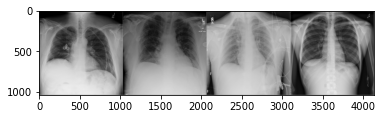

landmarks :  torch.Size([4, 100, 2])


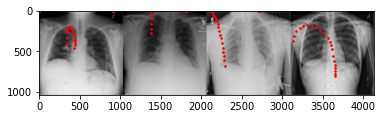

segmentation label :  torch.Size([4, 1, 256, 256])


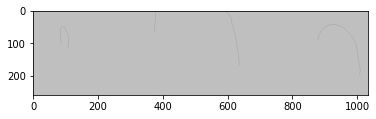

predicted outputs :  torch.Size([4, 2, 256, 256])


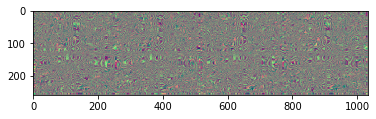

In [64]:

from torch.autograd import Variable

_, my_testset = load_data()

my_testloader = torch.utils.data.DataLoader(
        my_testset, batch_size=4, shuffle=False, num_workers=2)

dataiter = iter(my_testloader)
sample = dataiter.next()



print('input : ', sample['image'].shape)
imshow(torchvision.utils.make_grid(sample['image']))


print('landmarks : ',sample['landmark'].shape)
imshow_landmark(torchvision.utils.make_grid(sample['image']), sample['landmark'])


my_labels = torch.unsqueeze(sample['label'], 1)
print('segmentation label : ',my_labels.shape)
imshow_segmented(torchvision.utils.make_grid(my_labels))


####################################
device = "cpu"
if torch.cuda.is_available():
    device = "cuda:0"
    if torch.cuda.device_count() > 1:
        my_net = nn.DataParallel(my_net)
my_net.to(device)


inputs, labels = sample['image'].float(), sample['label']
batch_size = int(inputs.shape[0])
inputs, labels = inputs.to(device), labels.to(device)
my_outputs = my_net(inputs)['out']
outputs = torch.squeeze(my_outputs, 0)
print('predicted outputs : ',outputs.shape)
imshow_segmented(torchvision.utils.make_grid(outputs))